# EDA via PyCaret  

Tutorial pages: https://pycaret.gitbook.io/docs/get-started/tutorials  
Binary Classification page: https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb  


In [1]:
from pycaret.classification import *
import pandas as pd
from sklearn.model_selection import train_test_split
from config import *

In [2]:
df=pd.read_csv(INTERIM_DIR+'/tmp_df.csv')
df.tail()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
1980,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,NO,LumA,4.0,Positve,Positive,3.0,NEUTRAL,Negative,Lobular,YES,Pre,3,Right,1.0,4.0,5.05,196.866667,0:LIVING,Positive,YES,194.28,0:Not Recurred,ER+/HER2- Low Prolif,5.230071,25.0,NaN,Living
1981,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumB,4.0,Positve,Positive,3.0,GAIN,Positive,Ductal/NST,NO,Pre,5,NaN,1.0,6.0,5.04,44.733333,1:DECEASED,Negative,YES,16.09,1:Recurred,NaN,7.845106,20.0,NaN,Died of Disease
1982,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumB,4.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,YES,Post,1,Left,45.0,4.0,6.05,175.966667,1:DECEASED,Positive,YES,121.18,1:Recurred,NaN,5.230071,25.0,NaN,Died of Disease
1983,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,LumB,4.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,YES,Post,1,NaN,12.0,15.0,5.05,86.233333,1:DECEASED,Positive,NO,85.10,0:Not Recurred,ER+/HER2- High Prolif,19.612766,25.0,NaN,Died of Other Causes
1984,60.02,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumB,4.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,YES,Post,10,NaN,1.0,3.0,5.04,201.900000,1:DECEASED,Negative,YES,199.24,0:Not Recurred,ER+/HER2- High Prolif,3.922553,20.0,NaN,Died of Other Causes


In [3]:
df.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

# columns 対応表

|metabric.csv|outcome.csv|
|-|-|
|Overall Survival Status|OS_STATUS|
|Overall Survival (Months)|OS_MONTHS|
|Relapse Free Status|RFS_STATUS|
|Relapse Free Status (Months)|RFS_MONTHS|
|Patient's Vital Status|VITAL_STATUS|




In [4]:
# drop outcome candidate
drop_columns = [
    # 'Overall Survival Status'
    'Overall Survival (Months)',
    'Relapse Free Status',
    'Relapse Free Status (Months)',
    "Patient's Vital Status"
]
df_caret=df.drop(drop_columns,axis=1)
df_caret.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival Status', 'PR Status', 'Radio Therapy',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage'],
      dtype='object')

# PyCaret models
PyCaretを使用し、簡単にデータの傾向と予測の関係性を見てみる

In [5]:
train_X, test_X= train_test_split(df_caret, test_size=0.25, random_state=0)

In [6]:
exp_clf101=setup(train_X, target='Overall Survival Status', session_id=1)

,Description,Value
0,session_id,1
1,Target,Overall Survival Status
2,Target Type,Binary
3,Label Encoded,"0:LIVING: 0, 1:DECEASED: 1"
4,Original Data,"(1488, 28)"
5,Missing Values,1
6,Numeric Features,7
7,Categorical Features,20
8,Ordinal Features,0
9,High Cardinality Features,0


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7065,0.7553,0.8004,0.7210,0.7572,0.3881,0.3945,0.0590
gbc,Gradient Boosting Classifier,0.6950,0.7601,0.7835,0.7134,0.7462,0.3656,0.3695,0.0590
ada,Ada Boost Classifier,0.6911,0.7372,0.7566,0.7214,0.7375,0.3621,0.3643,0.0260
xgboost,Extreme Gradient Boosting,0.6873,0.7417,0.7465,0.7197,0.7316,0.3564,0.3590,0.4060
ridge,Ridge Classifier,0.6709,0.0000,0.7416,0.7019,0.7204,0.3207,0.3226,0.0030
lda,Linear Discriminant Analysis,0.6709,0.7331,0.7365,0.7040,0.7191,0.3218,0.3235,0.0050
lr,Logistic Regression,0.6680,0.7395,0.7332,0.7019,0.7167,0.3159,0.3170,0.2700
lightgbm,Light Gradient Boosting Machine,0.6671,0.7422,0.7282,0.7043,0.7141,0.3146,0.3177,0.7100
et,Extra Trees Classifier,0.6632,0.7099,0.7702,0.6833,0.7231,0.2962,0.3024,0.0500
knn,K Neighbors Classifier,0.6525,0.6821,0.7113,0.6936,0.7014,0.2854,0.2866,0.0070


In [8]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6827,0.7345,0.8167,0.6901,0.7481,0.3276,0.3361
1,0.6442,0.7000,0.7333,0.6769,0.7040,0.2600,0.2613
2,0.7308,0.7814,0.7333,0.7857,0.7586,0.4551,0.4565
3,0.7212,0.7794,0.7833,0.7460,0.7642,0.4235,0.4243
4,0.7308,0.7722,0.8667,0.7222,0.7879,0.4277,0.4411
5,0.6923,0.7528,0.8333,0.6944,0.7576,0.3459,0.3568
6,0.7212,0.7699,0.8644,0.7083,0.7786,0.4119,0.4270
7,0.6346,0.6819,0.6780,0.6780,0.6780,0.2557,0.2557
8,0.7212,0.7770,0.8475,0.7143,0.7752,0.4151,0.4257
9,0.7864,0.8043,0.8475,0.7937,0.8197,0.5585,0.5603


In [11]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [12]:
tuned_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6442,0.6928,0.8000,0.6575,0.7218,0.2413,0.2504
1,0.6058,0.6689,0.7667,0.6301,0.6917,0.1593,0.1653
2,0.7308,0.7568,0.8500,0.7286,0.7846,0.4312,0.4404
3,0.7500,0.7818,0.9333,0.7179,0.8116,0.4583,0.4944
4,0.7019,0.7402,0.9000,0.6835,0.7770,0.3521,0.3836
5,0.7019,0.7595,0.8667,0.6933,0.7704,0.3603,0.3789
6,0.6442,0.7718,0.8475,0.6410,0.7299,0.2371,0.2577
7,0.6346,0.6825,0.7627,0.6522,0.7031,0.2356,0.2405
8,0.7115,0.7989,0.8305,0.7101,0.7656,0.3965,0.4048
9,0.6990,0.7758,0.8814,0.6842,0.7704,0.3533,0.3778


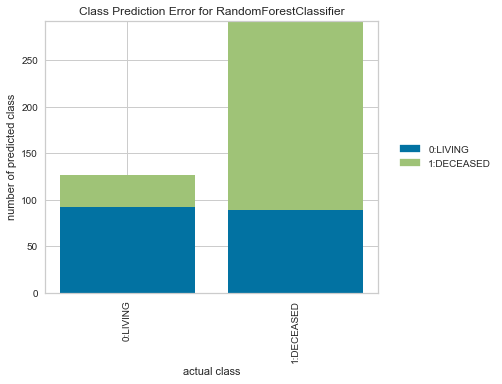

In [13]:
plot_model(tuned_rf, plot = 'error')

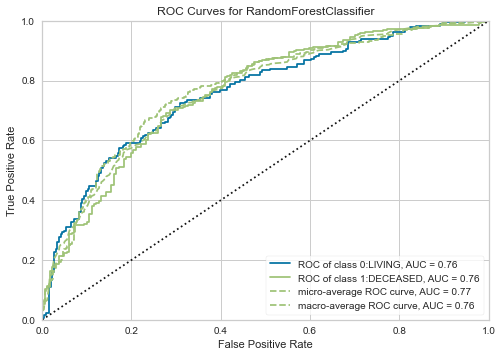

In [14]:
plot_model(tuned_rf)

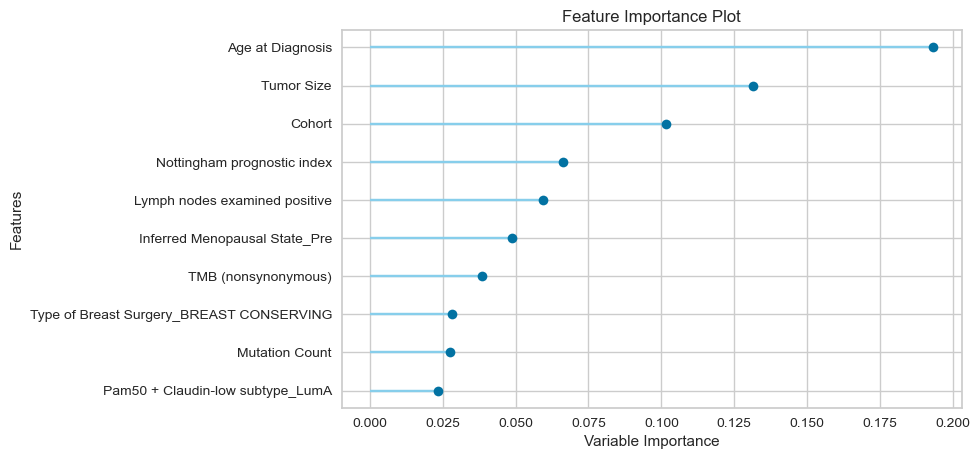

In [15]:
plot_model(tuned_rf, plot='feature')

In [16]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7226,0.7616,0.8684,0.7219,0.7884,0.3956,0.4100


In [18]:
final_rf = finalize_model(tuned_rf)
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [19]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7740,0.8359,0.9060,0.7603,0.8268,0.5090,0.5254


In [20]:
lightgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6635,0.7106,0.8000,0.6761,0.7328,0.2868,0.2943
1,0.6346,0.6803,0.7000,0.6774,0.6885,0.2470,0.2471
2,0.7115,0.7542,0.7167,0.7679,0.7414,0.4162,0.4174
3,0.6154,0.7004,0.6333,0.6786,0.6552,0.2216,0.2222
4,0.6442,0.7530,0.7667,0.6667,0.7132,0.2508,0.2551
5,0.6442,0.7250,0.7667,0.6667,0.7132,0.2508,0.2551
6,0.7500,0.8437,0.8644,0.7391,0.7969,0.4770,0.4869
7,0.5962,0.6772,0.6102,0.6545,0.6316,0.1860,0.1865
8,0.6731,0.7424,0.6949,0.7193,0.7069,0.3376,0.3378
9,0.7379,0.8355,0.7288,0.7963,0.7611,0.4720,0.4743


In [21]:
tuned_lightgbm=tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6731,0.7110,0.7833,0.6912,0.7344,0.3137,0.3178
1,0.6250,0.6648,0.7333,0.6567,0.6929,0.2152,0.2173
2,0.7308,0.7591,0.7500,0.7759,0.7627,0.4518,0.4522
3,0.7115,0.7455,0.7667,0.7419,0.7541,0.4055,0.4058
4,0.7212,0.7678,0.8500,0.7183,0.7786,0.4091,0.4198
5,0.7115,0.7545,0.8167,0.7206,0.7656,0.3944,0.3997
6,0.7692,0.8395,0.8475,0.7692,0.8065,0.5224,0.5262
7,0.6538,0.6783,0.7288,0.6825,0.7049,0.2874,0.2883
8,0.7115,0.7680,0.7627,0.7377,0.7500,0.4093,0.4096
9,0.7282,0.7816,0.7458,0.7719,0.7586,0.4477,0.4481


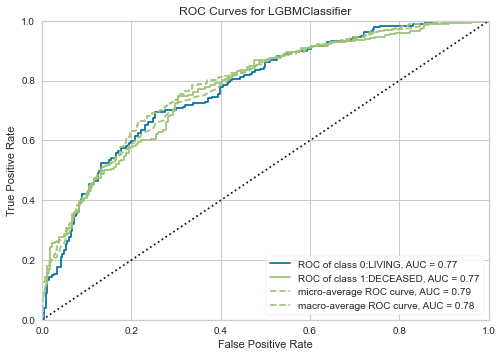

In [22]:
plot_model(tuned_lightgbm)

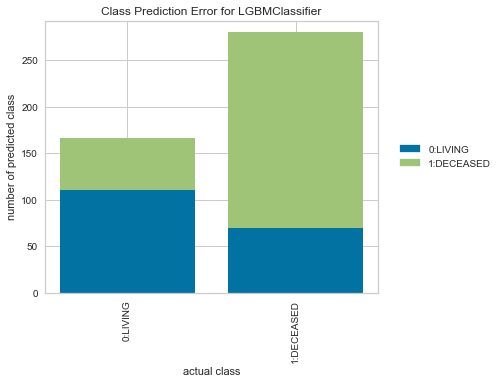

In [23]:
plot_model(tuned_lightgbm, plot = 'error')

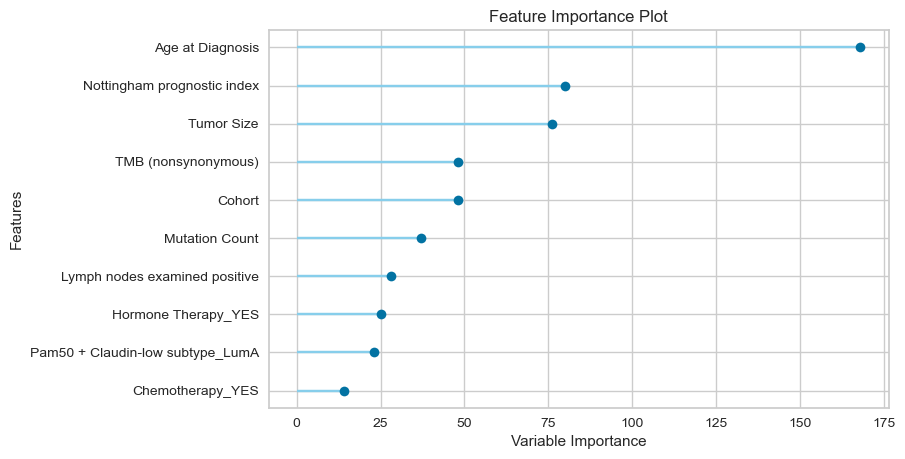

In [24]:
plot_model(tuned_lightgbm, plot='feature')

In [25]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7181,0.7746,0.7895,0.7500,0.7692,0.4078,0.4087


In [27]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.6, n_estimators=280, n_jobs=-1, num_leaves=70,
               objective=None, random_state=1, reg_alpha=0.1, reg_lambda=0.001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [28]:
predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8300,0.9030,0.8835,0.8393,0.8608,0.6428,0.6442
